In [1]:
import imblearn
print(imblearn.__version__)

0.13.0


In [82]:
from imblearn.combine import SMOTETomek
print("Smotetomek succesfully imported") 

Smotetomek succesfully imported


In [84]:
import pandas as pd
df=pd.read_csv("social_demographic.csv")
df.head()

,age,gender,sex,education,Employment_status,Personal_Net_Income_Category,Ethnic_Background,living_arrangement,marital_status,hours_on_social_media,loneliness_score,social_media_frequency,mhi5_class_2022,gender.1,Religion,Religious_Membership,political_interest,mhi5_std_score_2022,nomem_encr
0,60.0,999,1.0,6.0,1,7.0,2.0,3.0,1.0,2.0,0,1.0,0.0,999,NaN,2.0,1.0,84.0,800015
1,32.0,999,2.0,4.0,1,4.0,2.0,3.0,1.0,18.0,0,3.0,1.0,999,10.0,1.0,2.0,52.0,800100
2,49.0,999,1.0,4.0,1,4.0,1.0,2.0,1.0,17.0,0,6.0,0.0,999,NaN,2.0,2.0,64.0,800201
3,70.0,999,1.0,6.0,9,6.0,1.0,2.0,1.0,0.0,0,5.0,0.0,999,NaN,2.0,1.0,76.0,800228
4,60.0,999,1.0,4.0,4,5.0,1.0,3.0,1.0,6.0,0,7.0,0.0,999,NaN,2.0,1.0,88.0,800392


In [86]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           995 non-null    float64
 1   gender                        995 non-null    int64  
 2   sex                           995 non-null    float64
 3   education                     993 non-null    float64
 4   Employment_status             995 non-null    int64  
 5   Personal_Net_Income_Category  993 non-null    float64
 6   Ethnic_Background             961 non-null    float64
 7   living_arrangement            995 non-null    float64
 8   marital_status                995 non-null    float64
 9   hours_on_social_media         995 non-null    float64
 10  loneliness_score              995 non-null    int64  
 11  social_media_frequency        986 non-null    float64
 12  mhi5_class_2022               994 non-null    float64
 13  gende

In [88]:
import pandas as pd

# Define the target variable
target_column = ['mhi5_class_2022']

# Columns that are inside blocks but MAY only be needed for error analysis
possible_error_analysis_columns = ['gender', 'Religion', 'Religious_Membership', 'political_interest','mhi5_std_score_2022', 'gender.1', 'Ethnic_Background', 'social_media_frequency' ]

# Full list of extra columns
keep_columns = target_column + possible_error_analysis_columns




# Separate features and target
X = df.drop(columns=keep_columns + ['nomem_encr']) 
y = df[target_column[0]]  # Target variable



In [90]:
X= X.reset_index(drop=True)
y= y.reset_index(drop=True)

In [92]:
print(X.shape)
print(y.shape)

(995, 9)
(995,)


In [94]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           995 non-null    float64
 1   sex                           995 non-null    float64
 2   education                     993 non-null    float64
 3   Employment_status             995 non-null    int64  
 4   Personal_Net_Income_Category  993 non-null    float64
 5   living_arrangement            995 non-null    float64
 6   marital_status                995 non-null    float64
 7   hours_on_social_media         995 non-null    float64
 8   loneliness_score              995 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 70.1 KB


In [96]:
print(X.isna().sum()) 
# the classidfer cannot work if some entries have NAN

age                             0
sex                             0
education                       2
Employment_status               0
Personal_Net_Income_Category    2
living_arrangement              0
marital_status                  0
hours_on_social_media           0
loneliness_score                0
dtype: int64


In [98]:
X.loc[:, "education"] = X["education"].fillna(X["education"].mean())
X.loc[:, "Personal_Net_Income_Category"] = X["Personal_Net_Income_Category"].fillna(X["Personal_Net_Income_Category"].mean())

In [100]:
print(X.isna().sum())  # check for nan

age                             0
sex                             0
education                       0
Employment_status               0
Personal_Net_Income_Category    0
living_arrangement              0
marital_status                  0
hours_on_social_media           0
loneliness_score                0
dtype: int64


In [102]:
print(y.isna().sum())
print(y.dtype)

1
float64


In [104]:

y.dropna(inplace=True)  #drop the entry with nan
X = X.loc[y.index]    # keep X and y aligned
print(y.isna().sum())

0


Nested CROSS-Validation

In [107]:
from sklearn.model_selection import train_test_split

# Stratified train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [109]:
# this cell code should stay. sampler defination is needed for lr and random forest cell code.
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedKFold

# Sampler dictionary
samplers = {
    'none': None,
    'undersample': RandomUnderSampler(random_state=42),
    'smotetomek': SMOTETomek(random_state=42)
}

# Outer CV (voor consistentie)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


#### Logistic Regression:

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import numpy as np
import joblib

# Hyperparameter grid
param_grid_lr = {
    'sampler': [samplers['none'], samplers['undersample'], samplers['smotetomek']],
    'classifier__C': [0.01, 0.1, 1, 10]
}

# Pipeline
pipeline_lr = ImbPipeline([
    ('sampler', SMOTETomek()),  # wordt geswitched op basis van de param_grid_lr
    ('scaler', StandardScaler()), # hier doen na datasplit anders dataleakage niet bij preprocessing.
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# GridSearch
grid_lr = GridSearchCV(pipeline_lr, param_grid=param_grid_lr, cv=3, scoring='f1', n_jobs=-1) # cv gaat automatisch stratifiedsplit

# nested cross_validation
from sklearn.model_selection import cross_validate
nested_cv_search = cross_validate(
    grid_lr,
    X=X_train,
    y=y_train,
    cv=5,
    scoring='f1',
    error_score='raise',
    return_estimator=True,
    return_train_score=False,
    verbose=1,
    n_jobs=-1
)
print("Nested CV results:")
print(nested_cv_search['test_score'])
print("Mean F1 score:", nested_cv_search['test_score'].mean())
print('STD F1 score:', nested_cv_search['test_score'].std())
best_score_index = np.argmax(nested_cv_search['test_score'])
best_model = nested_cv_search['estimator'][best_score_index]
print('Parameters of the best model:', best_model.best_params_)
# print the parameters of all 5 models
for i, model in enumerate(nested_cv_search['estimator']):
    print(f"Model {i+1} parameters: {model.best_params_}")

# sla de nested_cv op
joblib.dump(nested_cv_search, 'nested_cv_search_lr_social+demo.pkl')


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Nested CV results:
[0.38297872 0.36781609 0.41237113 0.29885057 0.33684211]
Mean F1 score: 0.3597717258709397
STD F1 score: 0.03900545720166664
Parameters of the best model: {'classifier__C': 0.01, 'sampler': RandomUnderSampler(random_state=42)}
Model 1 parameters: {'classifier__C': 0.01, 'sampler': RandomUnderSampler(random_state=42)}
Model 2 parameters: {'classifier__C': 10, 'sampler': SMOTETomek(random_state=42)}
Model 3 parameters: {'classifier__C': 0.01, 'sampler': RandomUnderSampler(random_state=42)}
Model 4 parameters: {'classifier__C': 10, 'sampler': RandomUnderSampler(random_state=42)}
Model 5 parameters: {'classifier__C': 0.01, 'sampler': RandomUnderSampler(random_state=42)}


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.6s finished


['nested_cv_search_lr_social+demo.pkl']

#### Random Forest

In [115]:
import optuna
from optuna.integration import OptunaSearchCV
from optuna.distributions import IntDistribution, CategoricalDistribution

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.combine import SMOTETomek
from sklearn.model_selection import StratifiedKFold, cross_validate
import numpy as np
import joblib

# Sampler dictionary
samplers = {
    'none': None,
    'undersample': RandomUnderSampler(random_state=42),
    'smotetomek': SMOTETomek(random_state=42)
}

# Define sampler mapping (assumes this exists globally)
sampler_map = {
    'none': 'passthrough', # placeholder
    'undersample': samplers['undersample'],
    'smotetomek': samplers['smotetomek']
}

# Custom pipeline that resolves string samplers
class SamplerResolvingPipeline(ImbPipeline):
    def set_params(self, **kwargs):
        if 'sampler' in kwargs and isinstance(kwargs['sampler'], str):
            kwargs['sampler'] = sampler_map[kwargs['sampler']]
        return super().set_params(**kwargs)

# Pipeline
pipeline_rf = SamplerResolvingPipeline([
    ('sampler', 'passthrough'),  # placeholder.'passthrough' is the correct way to skip a pipeline step in scikit-learn.Just don’t ever pass None ( like in the samplers definition) directly into the pipeline — but you didn’t, so you’re good.
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1))
])

# Define Optuna hyperparameter search space
param_distributions_rf = {
    'sampler': CategoricalDistribution(['none', 'undersample', 'smotetomek']),
    'classifier__n_estimators': IntDistribution(50, 250, step=50),
    'classifier__max_depth': CategoricalDistribution([None, 5, 10, 15, 20]),
    'classifier__max_features': CategoricalDistribution(['sqrt', 'log2']),  # 'auto' deprecated
    'classifier__min_samples_split': IntDistribution(2, 10),
    'classifier__min_samples_leaf': IntDistribution(1, 4)
}

# Inner CV: 3-fold hyperparameter tuning with Optuna
optuna_search_rf = OptunaSearchCV(
    estimator=pipeline_rf,
    param_distributions=param_distributions_rf,
    cv=3,
    n_trials=50,
    scoring='f1',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Outer CV: 5-fold nested cross-validation
nested_cv_search = cross_validate(
    optuna_search_rf,
    X=X_train,
    y=y_train,
    cv=5,
    scoring='f1',
    error_score='raise',
    return_estimator=True,
    return_train_score=False,
    verbose=1,
    n_jobs=-1
)

# Results
print("Nested CV results:")
print(nested_cv_search['test_score'])
print("Mean F1 score:", nested_cv_search['test_score'].mean())
print("STD F1 score:", nested_cv_search['test_score'].std())

# Best model across folds
best_score_index = np.argmax(nested_cv_search['test_score'])
best_model = nested_cv_search['estimator'][best_score_index]
print('Parameters of the best model:', best_model.best_params_)

# Parameters of all models
for i, model in enumerate(nested_cv_search['estimator']):
    print(f"Model {i+1} parameters: {model.best_params_}")

# Save results
joblib.dump(nested_cv_search, 'nested_cv_search_rf_social+demo.pkl')


C:\Users\u1246538\AppData\Local\Temp\ipykernel_3872\3120499869.py:52: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  optuna_search_rf = OptunaSearchCV(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
C:\Users\u1246538\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:125: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  new_object = klass(**new_object_params)
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   45.5s finished


Nested CV results:
[0.35294118 0.41237113 0.37254902 0.35051546 0.43137255]
Mean F1 score: 0.38394986860723673
STD F1 score: 0.03245321773901493
Parameters of the best model: {'sampler': 'undersample', 'classifier__n_estimators': 200, 'classifier__max_depth': None, 'classifier__max_features': 'log2', 'classifier__min_samples_split': 4, 'classifier__min_samples_leaf': 1}
Model 1 parameters: {'sampler': 'undersample', 'classifier__n_estimators': 200, 'classifier__max_depth': 5, 'classifier__max_features': 'log2', 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 4}
Model 2 parameters: {'sampler': 'undersample', 'classifier__n_estimators': 100, 'classifier__max_depth': 5, 'classifier__max_features': 'log2', 'classifier__min_samples_split': 10, 'classifier__min_samples_leaf': 4}
Model 3 parameters: {'sampler': 'undersample', 'classifier__n_estimators': 100, 'classifier__max_depth': None, 'classifier__max_features': 'log2', 'classifier__min_samples_split': 3, 'classifier__

['nested_cv_search_rf_social+demo.pkl']

#### SVM

In [117]:
import optuna
from optuna.integration import OptunaSearchCV
from optuna.distributions import CategoricalDistribution, FloatDistribution, IntDistribution

import numpy as np
import joblib
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.base import clone
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler

# 1. Define your sampler map
sampler_map = {
    'none': 'passthrough',
    'undersample': RandomUnderSampler(),
    'smotetomek': SMOTETomek()
}

# 2. Custom pipeline class that resolves sampler strings
class SamplerResolvingPipeline(ImbPipeline):
    def set_params(self, **kwargs):
        if 'sampler' in kwargs and isinstance(kwargs['sampler'], str):
            kwargs['sampler'] = sampler_map[kwargs['sampler']]
        return super().set_params(**kwargs)

# 3. Define the pipeline
pipeline = SamplerResolvingPipeline([
    ('sampler', 'passthrough'),  # will be overridden
    ('scaler', StandardScaler()),
    ('classifier', SVC(probability=True, random_state=42))
])

# 4. Define Optuna-compatible search space
param_distributions = {
    'sampler': CategoricalDistribution(['none', 'undersample', 'smotetomek']),
    'classifier__kernel': CategoricalDistribution(['linear', 'rbf', 'poly']),
    'classifier__C': FloatDistribution(0.1, 100, log=True),
    'classifier__gamma': CategoricalDistribution(['scale', 'auto', 0.1, 0.01, 0.001]),
    'classifier__degree': IntDistribution(2, 5),  # only for 'poly'
    'classifier__class_weight': CategoricalDistribution([None, 'balanced'])
}

# 5. Setup OptunaSearchCV (inner CV: 3-fold)
optuna_search = OptunaSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    cv=3,
    n_trials=50,
    scoring='f1',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# 6. Outer nested cross-validation (5-fold)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
nested_cv_results = cross_validate(
    optuna_search,
    X=X_train,
    y=y_train,
    cv=outer_cv,
    scoring='f1',
    return_estimator=True,
    return_train_score=False,
    verbose=1,
    n_jobs=-1
)

# 7. Print and save results
print("Nested CV F1 scores:", nested_cv_results['test_score'])
print("Mean F1 score:", np.mean(nested_cv_results['test_score']))
print("STD F1 score:", np.std(nested_cv_results['test_score']))
print("Best parameters per fold:")
for i, model in enumerate(nested_cv_results['estimator']):
    print(f"Fold {i+1}: {model.best_params_}")
best_score_index = np.argmax(nested_cv_results['test_score'])
best_model = nested_cv_results['estimator'][best_score_index]
print("Parameters of the best overall model:", best_model.best_params_)

joblib.dump(nested_cv_results, 'nested_cv_optuna_svm.pkl')


C:\Users\u1246538\AppData\Local\Temp\ipykernel_3872\534800832.py:47: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  optuna_search = OptunaSearchCV(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
C:\Users\u1246538\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:125: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  new_object = klass(**new_object_params)


Nested CV F1 scores: [0.28235294 0.44444444 0.35051546 0.3373494  0.4516129 ]
Mean F1 score: 0.37325503007092176
STD F1 score: 0.0652340111939325
Best parameters per fold:
Fold 1: {'sampler': 'undersample', 'classifier__kernel': 'rbf', 'classifier__C': 0.3091136585029293, 'classifier__gamma': 'scale', 'classifier__degree': 5, 'classifier__class_weight': None}
Fold 2: {'sampler': 'smotetomek', 'classifier__kernel': 'linear', 'classifier__C': 2.532063504545848, 'classifier__gamma': 0.01, 'classifier__degree': 5, 'classifier__class_weight': 'balanced'}
Fold 3: {'sampler': 'undersample', 'classifier__kernel': 'linear', 'classifier__C': 0.5662668842502494, 'classifier__gamma': 0.1, 'classifier__degree': 4, 'classifier__class_weight': None}
Fold 4: {'sampler': 'undersample', 'classifier__kernel': 'rbf', 'classifier__C': 0.23611267695270652, 'classifier__gamma': 0.001, 'classifier__degree': 3, 'classifier__class_weight': None}
Fold 5: {'sampler': 'smotetomek', 'classifier__kernel': 'linear', 

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.0s finished


['nested_cv_optuna_svm.pkl']

#### XGBoost

In [119]:
# mocht het nou echt niet werken met XGBoost(extreme gradient boosting), dan GradientBoostingClassifier die zit in sklearn
import optuna
from optuna.integration import OptunaSearchCV
from optuna.distributions import CategoricalDistribution, FloatDistribution, IntDistribution
import numpy as np
import joblib
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.base import clone
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler

# 1. Define your sampler map
sampler_map = {
    'none': 'passthrough',
    'undersample': RandomUnderSampler(random_state=42),
    'smotetomek': SMOTETomek(random_state=42)
}

# 2. Custom pipeline class that resolves sampler strings
class SamplerResolvingPipeline(ImbPipeline):
    def set_params(self, **kwargs):
        if 'sampler' in kwargs and isinstance(kwargs['sampler'], str):
            kwargs['sampler'] = sampler_map[kwargs['sampler']]
        return super().set_params(**kwargs)

# 3. Define the pipeline
pipeline = SamplerResolvingPipeline([
    ('sampler', 'passthrough'),  # will be overridden
    ('scaler', StandardScaler()),
    ('classifier', xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42))
])

# 4. Define Optuna-compatible search space based on the provided hyperparameters
param_distributions = {
    'sampler': CategoricalDistribution(['none', 'undersample', 'smotetomek']),
    'classifier__n_estimators': CategoricalDistribution([50, 100, 200, 400, 500]),
    'classifier__learning_rate': FloatDistribution(0.01, 0.1, log=True),
    'classifier__max_depth': CategoricalDistribution([2, 4, 6, 10, 15]),
    'classifier__min_child_weight': CategoricalDistribution([1, 3, 5]),
    'classifier__subsample': CategoricalDistribution([0.6, 0.8, 1.0]),
    'classifier__colsample_bytree': CategoricalDistribution([0.6, 0.8, 1.0]),
    'classifier__gamma': FloatDistribution(0.0, 1.0, step=0.1),
    'classifier__reg_alpha': FloatDistribution(0.001, 5.0, log=True),  # L1 regularization
    'classifier__reg_lambda': FloatDistribution(0.001, 5.0, log=True),  # L2 regularization
}

# 5. Setup OptunaSearchCV (inner CV: 3-fold)
optuna_search = OptunaSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    cv=3,  # inner CV with 3 folds
    n_trials=50,
    scoring='f1',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# 6. Outer nested cross-validation (5-fold)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
nested_cv_results = cross_validate(
    optuna_search,
    X=X_train,
    y=y_train,
    cv=outer_cv,
    scoring='f1',
    return_estimator=True,
    return_train_score=False,
    verbose=1,
    n_jobs=-1
)

# 7. Print and save results
print("Nested CV F1 scores:", nested_cv_results['test_score'])
print("Mean F1 score:", np.mean(nested_cv_results['test_score']))
print("STD F1 score:", np.std(nested_cv_results['test_score']))
print("Best parameters per fold:")
for i, model in enumerate(nested_cv_results['estimator']):
    print(f"Fold {i+1}: {model.best_params_}")

best_score_index = np.argmax(nested_cv_results['test_score'])
best_model = nested_cv_results['estimator'][best_score_index]
print("Parameters of the best overall model:", best_model.best_params_)

# Save the results
joblib.dump(nested_cv_results, 'nested_cv_optuna_xgb.pkl')

C:\Users\u1246538\AppData\Local\Temp\ipykernel_3872\183134602.py:51: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  optuna_search = OptunaSearchCV(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
C:\Users\u1246538\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:125: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  new_object = klass(**new_object_params)


Nested CV F1 scores: [0.31578947 0.40449438 0.30927835 0.33009709 0.44444444]
Mean F1 score: 0.3608207476090463
STD F1 score: 0.053904891508462664
Best parameters per fold:
Fold 1: {'sampler': 'undersample', 'classifier__n_estimators': 500, 'classifier__learning_rate': 0.039404765031157196, 'classifier__max_depth': 15, 'classifier__min_child_weight': 1, 'classifier__subsample': 0.6, 'classifier__colsample_bytree': 1.0, 'classifier__gamma': 0.30000000000000004, 'classifier__reg_alpha': 4.920483301667522, 'classifier__reg_lambda': 0.011585262050963972}
Fold 2: {'sampler': 'undersample', 'classifier__n_estimators': 500, 'classifier__learning_rate': 0.014668330480953869, 'classifier__max_depth': 4, 'classifier__min_child_weight': 1, 'classifier__subsample': 0.6, 'classifier__colsample_bytree': 1.0, 'classifier__gamma': 1.0, 'classifier__reg_alpha': 4.154838168673665, 'classifier__reg_lambda': 0.9680593486980901}
Fold 3: {'sampler': 'undersample', 'classifier__n_estimators': 400, 'classifie

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.6s finished


['nested_cv_optuna_xgb.pkl']

## **Check welk model de hoogste gemiddelde F1 score heeft en die retrainen op de hele train set en testen op de hold-out test set**


In [121]:
from sklearn.metrics import classification_report
import joblib
import numpy as np

# Load nested CV results
models_info = {
    "LogisticRegression": joblib.load("nested_cv_search_lr_social+demo.pkl"),
    "RandomForest": joblib.load("nested_cv_search_rf_social+demo.pkl"),
    "SVM": joblib.load("nested_cv_optuna_svm.pkl"),
    "XGBoost": joblib.load("nested_cv_optuna_xgb.pkl"),
}

# Compare mean F1 scores
for name, result in models_info.items():
    mean_f1 = np.mean(result['test_score'])
    std_f1 = np.std(result['test_score'])
    print(f"{name}: Mean F1 = {mean_f1:.4f}, Std = {std_f1:.4f}")

# Find best model by mean F1 score
best_model_name = max(models_info, key=lambda name: np.mean(models_info[name]['test_score']))
best_model_cv = models_info[best_model_name]
best_index = np.argmax(best_model_cv['test_score'])
best_estimator = best_model_cv['estimator'][best_index]

print(f"\nBest model: {best_model_name} (fold {best_index+1})")
print("Best estimator params:", best_estimator.best_params_)

# Evaluate on test set 2022
y_pred = best_estimator.predict(X_test)
print(f"\n=== Evaluation of {best_model_name} on Test Set ===")
print(classification_report(y_test, y_pred))

LogisticRegression: Mean F1 = 0.3598, Std = 0.0390
RandomForest: Mean F1 = 0.3839, Std = 0.0325
SVM: Mean F1 = 0.3733, Std = 0.0652
XGBoost: Mean F1 = 0.3608, Std = 0.0539

Best model: RandomForest (fold 5)
Best estimator params: {'sampler': 'undersample', 'classifier__n_estimators': 200, 'classifier__max_depth': None, 'classifier__max_features': 'log2', 'classifier__min_samples_split': 4, 'classifier__min_samples_leaf': 1}

=== Evaluation of RandomForest on Test Set ===
              precision    recall  f1-score   support

         0.0       0.78      0.57      0.66       157
         1.0       0.20      0.40      0.27        42

    accuracy                           0.53       199
   macro avg       0.49      0.49      0.46       199
weighted avg       0.66      0.53      0.57       199



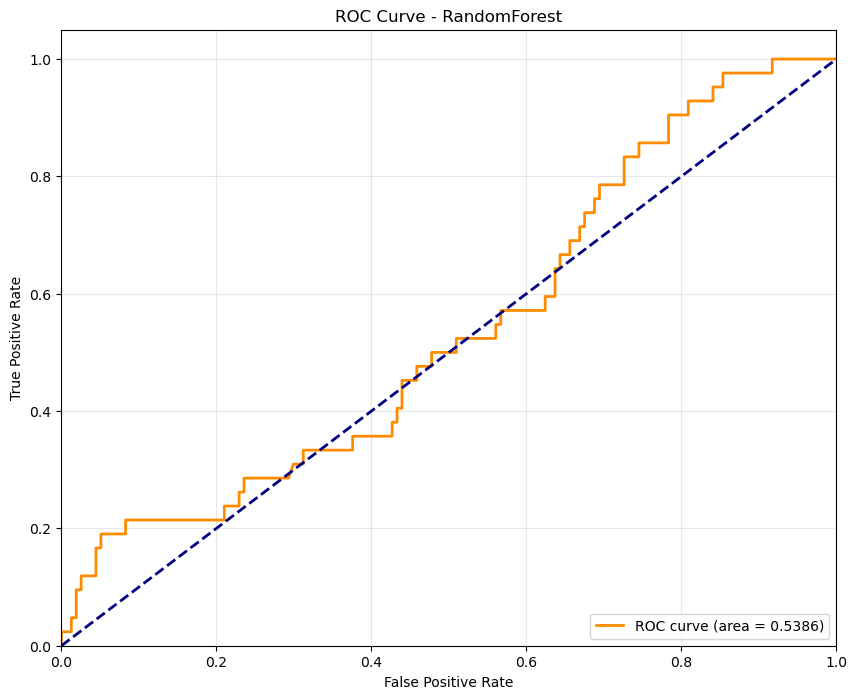

AUC-ROC: 0.5386


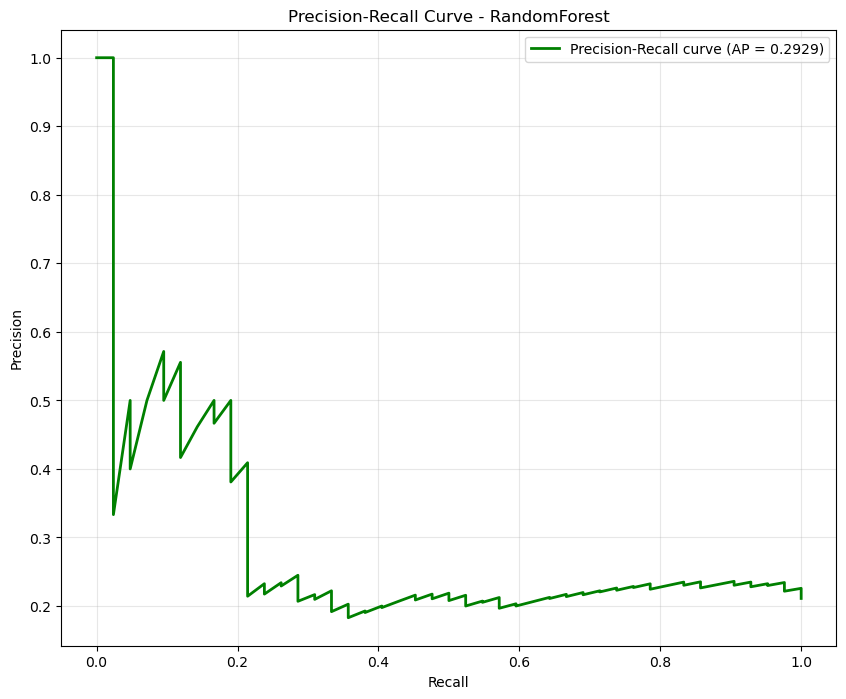

Average Precision: 0.2929


<Figure size 800x600 with 0 Axes>

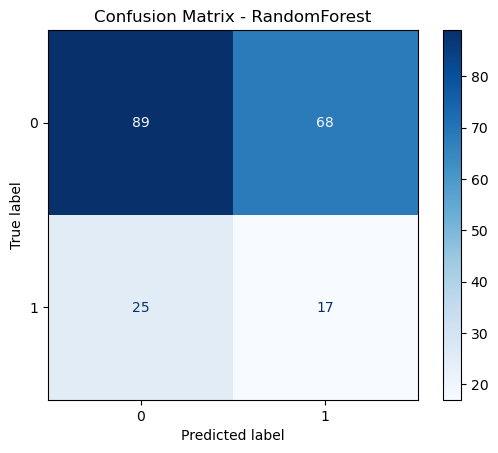


Confusion Matrix:
True Negatives: 89
False Positives: 68
False Negatives: 25
True Positives: 17

Calculating Permutation Feature Importance...


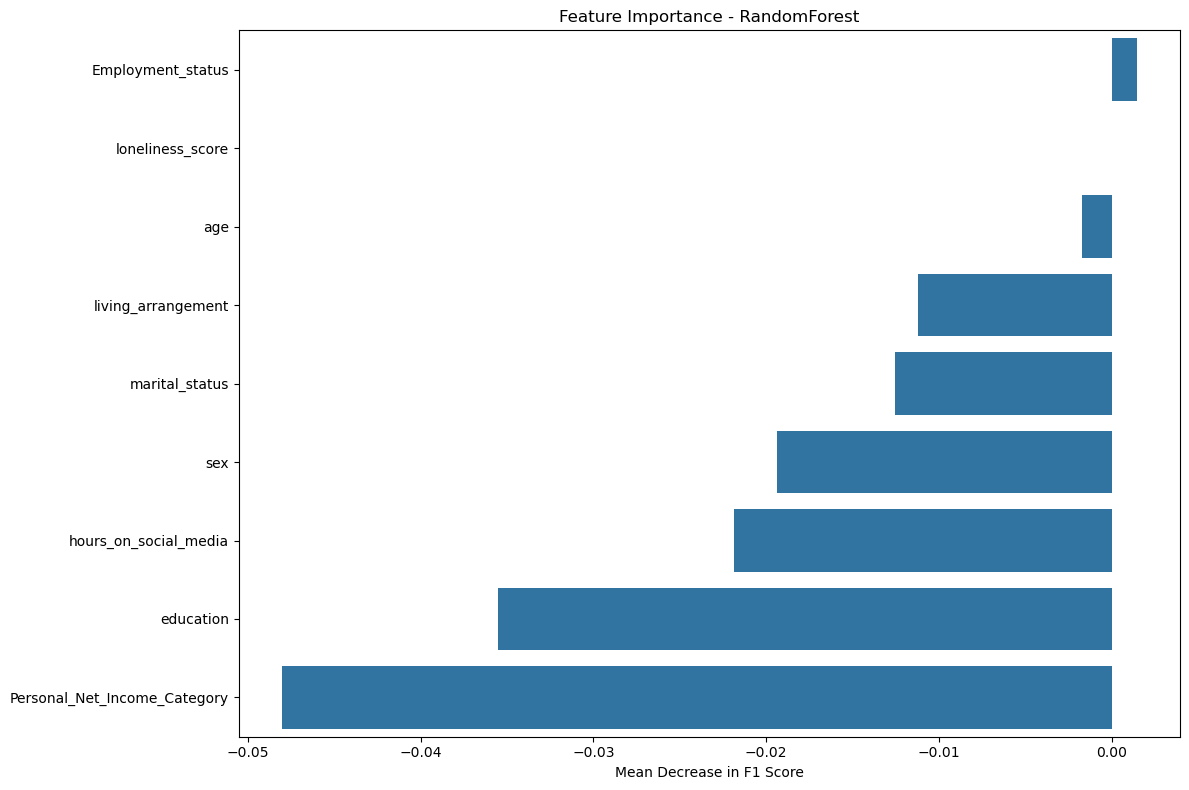


Top 10 Most Important Features:
Employment_status: 0.0015 ± 0.0133
loneliness_score: 0.0000 ± 0.0000
age: -0.0017 ± 0.0220
living_arrangement: -0.0112 ± 0.0104
marital_status: -0.0125 ± 0.0141
sex: -0.0194 ± 0.0135
hours_on_social_media: -0.0219 ± 0.0244
education: -0.0355 ± 0.0207
Personal_Net_Income_Category: -0.0480 ± 0.0181


In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, 
    ConfusionMatrixDisplay,
    roc_curve, 
    auc, 
    precision_recall_curve, 
    average_precision_score
)
from sklearn.inspection import permutation_importance

# We already have y_pred from the code above
# Get probabilities if the model supports it
if hasattr(best_estimator, "predict_proba"):
    y_proba = best_estimator.predict_proba(X_test)[:, 1]
    
    # === ROC Curve ===
    plt.figure(figsize=(10, 8))
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {best_model_name}')
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
    plt.show()
    print(f"AUC-ROC: {roc_auc:.4f}")
    
    # === Precision-Recall Curve ===
    plt.figure(figsize=(10, 8))
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    pr_auc = average_precision_score(y_test, y_proba)
    plt.plot(recall, precision, color='green', lw=2, 
             label=f'Precision-Recall curve (AP = {pr_auc:.4f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {best_model_name}')
    plt.legend(loc="upper right")
    plt.grid(True, alpha=0.3)
    plt.show()
    print(f"Average Precision: {pr_auc:.4f}")
else:
    print(f"Note: {best_model_name} does not support probability predictions for ROC and PR curves")

# === Confusion Matrix ===
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.show()

# Print confusion matrix values
print("\nConfusion Matrix:")
print(f"True Negatives: {cm[0,0]}")
print(f"False Positives: {cm[0,1]}")
print(f"False Negatives: {cm[1,0]}")
print(f"True Positives: {cm[1,1]}")

# === Permutation Feature Importance ===
print("\nCalculating Permutation Feature Importance...")
result = permutation_importance(
    best_estimator, 
    X_test, 
    y_test, 
    scoring='f1_weighted', 
    n_repeats=10, 
    random_state=42, 
    n_jobs=-1
)

# Get feature names
feature_names = X_test.columns if hasattr(X_test, 'columns') else [f"Feature {i}" for i in range(X_test.shape[1])]

# Sort features by importance
sorted_idx = result.importances_mean.argsort()[::-1]

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(
    x=result.importances_mean[sorted_idx], 
    y=[feature_names[i] for i in sorted_idx]
)
plt.title(f"Feature Importance - {best_model_name}")
plt.xlabel("Mean Decrease in F1 Score")
plt.tight_layout()
plt.show()

# Print top features with importance values
print("\nTop 10 Most Important Features:")
for i in sorted_idx[:10]:
    feature_name = feature_names[i]
    print(f"{feature_name}: {result.importances_mean[i]:.4f} ± {result.importances_std[i]:.4f}")

# * Evaluate estimated best Model on Test set 2023*

In [125]:
# Step 1: Import the 2023 data with MHI-5 outcomes
mhi_df_2023 = pd.read_csv(r"C:\Users\u1246538\Downloads\liss-data\Notebooks_MHI-5\merged_df_2023_cleaned_with_traits_and_values_cleaned_final_cleaned.csv")

# Step 2: Extract only the necessary columns using the actual column names
mhi_subset_2023 = mhi_df_2023[['nomem_encr', 'class', 'standardized_score']]

# Step 3: Rename columns to match our expected naming convention for consistency
mhi_subset_2023 = mhi_subset_2023.rename(columns={
    'class': 'MHI5_class_2023',
    'standardized_score': 'MHI5_std_score_2023'
})

# Step 4: Merge with your original dataframe
df_2022 = pd.read_csv("social_demographic.csv")
merged_df_2023 = df_2022.merge(mhi_subset_2023, on='nomem_encr', how='left')

print("Merged 2023 Data Shape:", merged_df_2023.shape)
merged_df_2023.head()

Merged 2023 Data Shape: (995, 21)


,age,gender,sex,education,Employment_status,Personal_Net_Income_Category,Ethnic_Background,living_arrangement,marital_status,hours_on_social_media,...,social_media_frequency,mhi5_class_2022,gender.1,Religion,Religious_Membership,political_interest,mhi5_std_score_2022,nomem_encr,MHI5_class_2023,MHI5_std_score_2023
0,60.0,999,1.0,6.0,1,7.0,2.0,3.0,1.0,2.0,...,1.0,0.0,999,NaN,2.0,1.0,84.0,800015,0.0,80.0
1,32.0,999,2.0,4.0,1,4.0,2.0,3.0,1.0,18.0,...,3.0,1.0,999,10.0,1.0,2.0,52.0,800100,0.0,80.0
2,49.0,999,1.0,4.0,1,4.0,1.0,2.0,1.0,17.0,...,6.0,0.0,999,NaN,2.0,2.0,64.0,800201,0.0,68.0
3,70.0,999,1.0,6.0,9,6.0,1.0,2.0,1.0,0.0,...,5.0,0.0,999,NaN,2.0,1.0,76.0,800228,0.0,80.0
4,60.0,999,1.0,4.0,4,5.0,1.0,3.0,1.0,6.0,...,7.0,0.0,999,NaN,2.0,1.0,88.0,800392,0.0,80.0


In [127]:

# Step 5: Prepare the 2023 features using the same transformations as 2022
# Keep only the same predictors that you used for X in 2022
X_2023 = merged_df_2023.drop(columns=keep_columns + ['MHI5_class_2023', 'MHI5_std_score_2023'])
y_2023 = merged_df_2023['MHI5_class_2023']


print("X_2023 Shape:", X_2023.shape, X.info())
print('-------------------------')
print("y_2023 Shape:", y_2023.shape, y.info())
print('-------------------------')
print("Missing values in X is...", X_2023.isna().sum())
print("Missing values in y is...", y_2023.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 994 entries, 0 to 994
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           994 non-null    float64
 1   sex                           994 non-null    float64
 2   education                     994 non-null    float64
 3   Employment_status             994 non-null    int64  
 4   Personal_Net_Income_Category  994 non-null    float64
 5   living_arrangement            994 non-null    float64
 6   marital_status                994 non-null    float64
 7   hours_on_social_media         994 non-null    float64
 8   loneliness_score              994 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 77.7 KB
X_2023 Shape: (995, 10) None
-------------------------
<class 'pandas.core.series.Series'>
Index: 994 entries, 0 to 994
Series name: mhi5_class_2022
Non-Null Count  Dtype  
--------------  -----  
994 

In [135]:
from sklearn.impute import SimpleImputer

# Reset indices
X_2023 = X_2023.reset_index(drop=True)
y_2023 = y_2023.reset_index(drop=True)

# Identify columns with NaNs in training data
columns_with_na = X_train.columns[X_train.isna().any()].tolist()
print("Columns with NA:", columns_with_na)

if columns_with_na:
    imputer = SimpleImputer(strategy='mean')
    imputer.fit(X_train[columns_with_na])
    X_2023[columns_with_na] = imputer.transform(X_2023[columns_with_na])
else:
    print("✅ No missing values in training data — skipping imputation.")

# Ensure y is a Series
if isinstance(y_2023, pd.DataFrame):
    y_2023 = y_2023.squeeze()

# Drop NaNs in y and align features
y_2023 = y_2023.dropna()
X_2023 = X_2023.loc[y_2023.index]

# Final check
print("NaNs in y_2023 before split:", y_2023.isna().sum())
print("y_2023 shape:", y_2023.shape)
print("X_2023 shape:", X_2023.shape)







Columns with NA: []
✅ No missing values in training data — skipping imputation.
NaNs in y_2023 before split: 0
y_2023 shape: (895,)
X_2023 shape: (895, 10)


In [141]:
# Split the 2023 data using the same approach as 2022
X_train_2023, X_test_2023, y_train_2023, y_test_2023 = train_test_split(
    X_2023, y_2023, test_size=0.2, random_state=42, stratify=y_2023
)

# NEW: Drop 'nomem_encr' from test set only bc you only evaluate on test set, no need of training set here
X_test_2023_clean = X_test_2023.drop(columns=["nomem_encr"], errors="ignore")


# Now you can use X_test_2023_clean safely for prediction:
y_pred_2023 = best_model.predict(X_test_2023_clean)
#Before train_test_split, you need nomem_encr for aligning the merge.
#After the split, you have X_train_2023 and X_test_2023.
#Only in X_test_2023, you drop 'nomem_encr' right before prediction.

print(f"\n=== Evaluation of {best_model_name} on 2023 Test Set ===")
print(classification_report(y_test_2023, y_pred_2023))


=== Evaluation of RandomForest on 2023 Test Set ===
              precision    recall  f1-score   support

         0.0       0.89      0.70      0.78       144
         1.0       0.34      0.63      0.44        35

    accuracy                           0.69       179
   macro avg       0.61      0.66      0.61       179
weighted avg       0.78      0.69      0.72       179



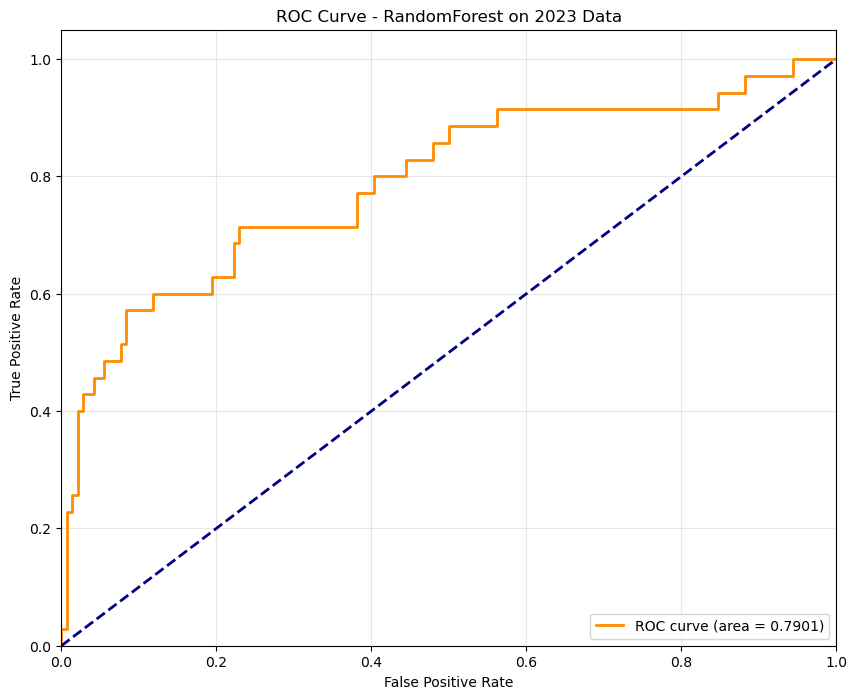

AUC-ROC (2023): 0.7901


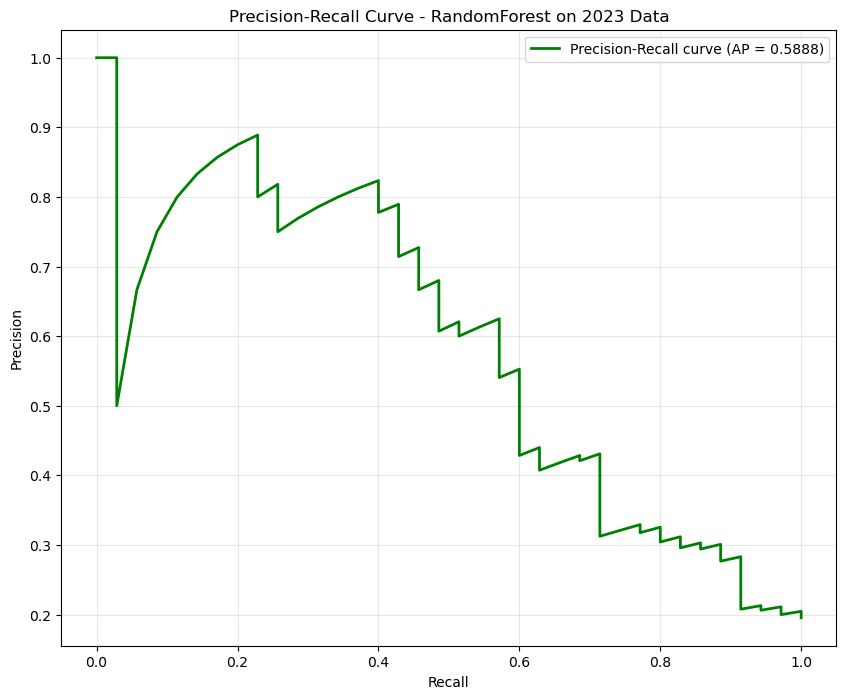

Average Precision (2023): 0.5888


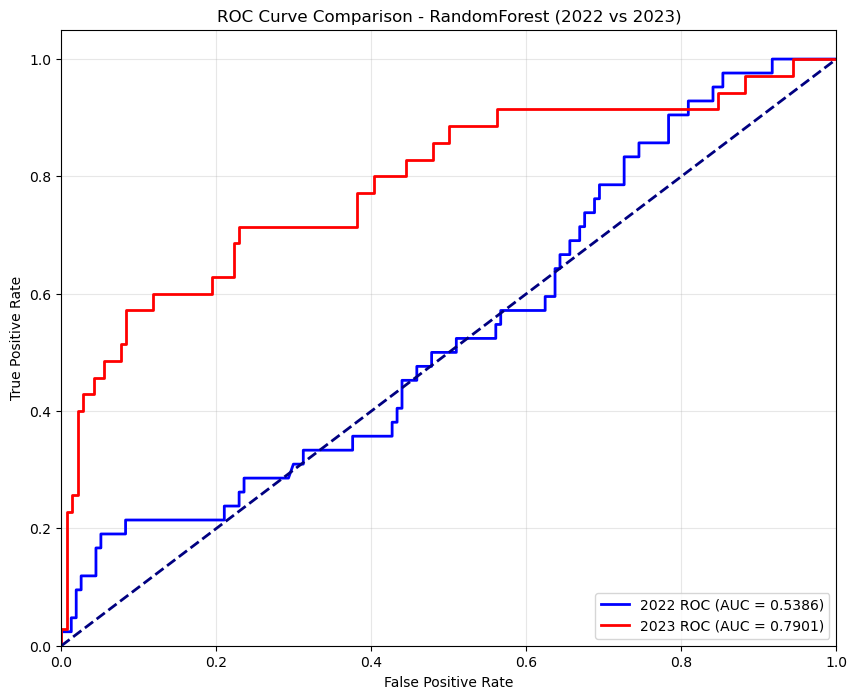

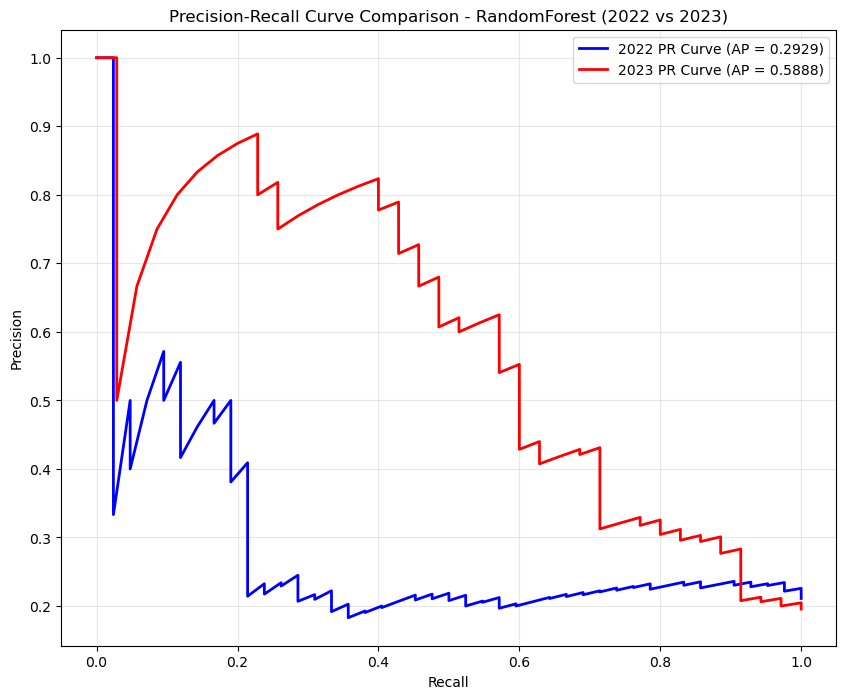

<Figure size 800x600 with 0 Axes>

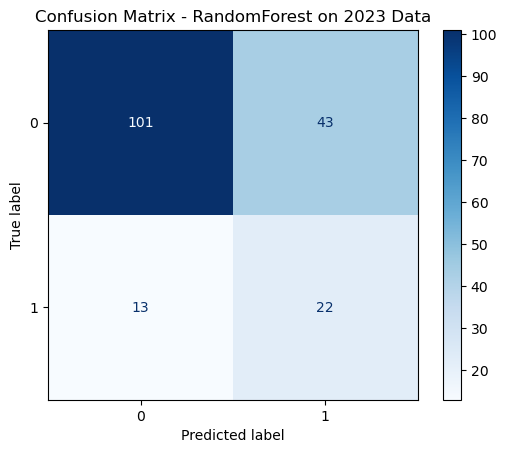


Confusion Matrix (2023):
True Negatives: 101
False Positives: 43
False Negatives: 13
True Positives: 22


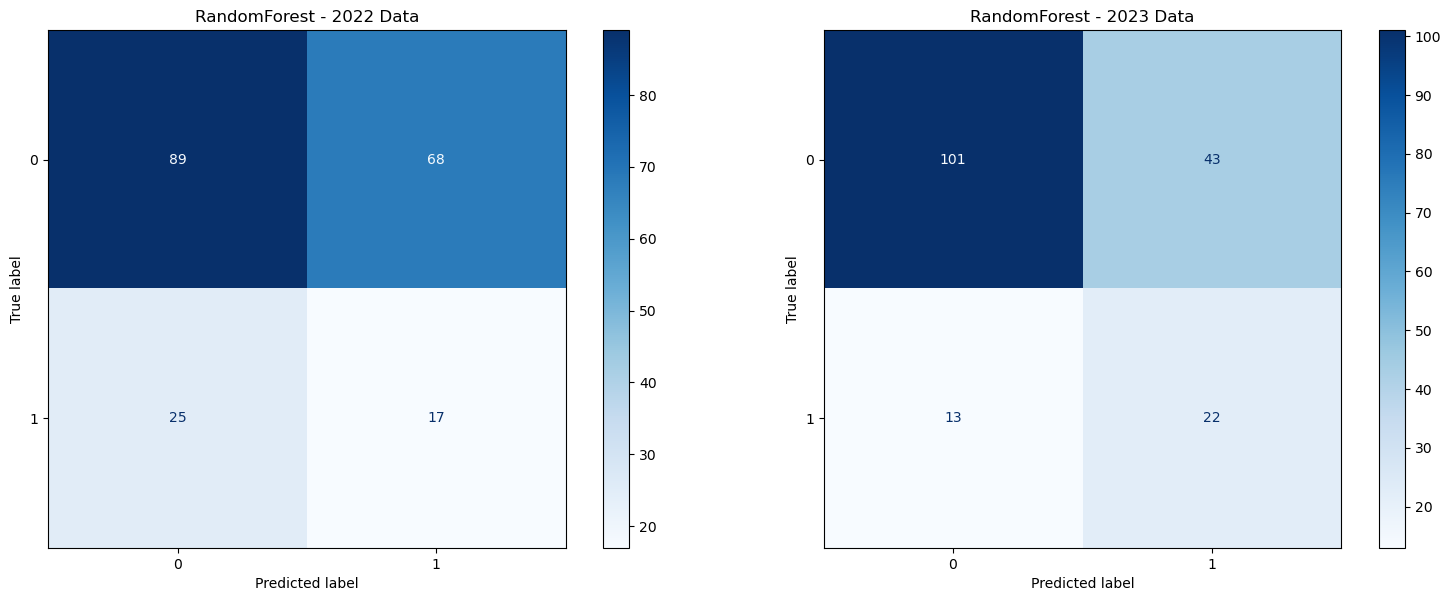


Calculating Permutation Feature Importance for 2023 data...


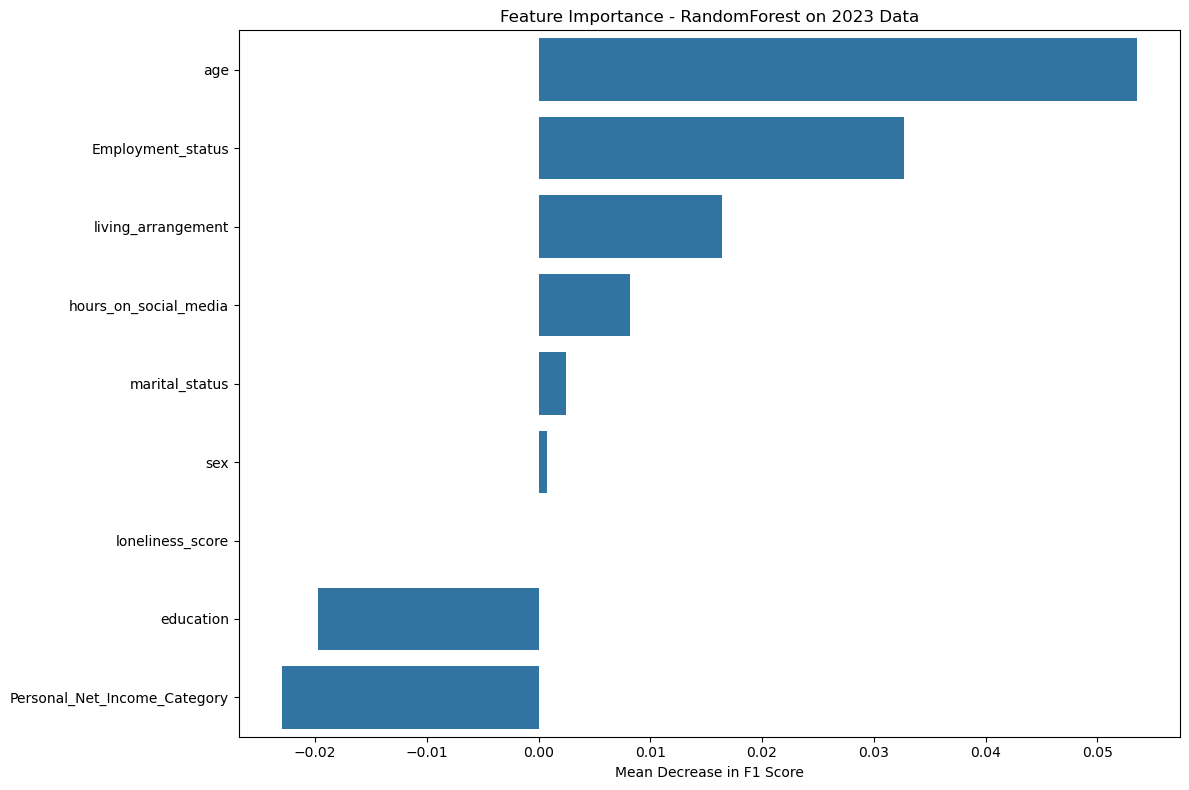


Top 10 Most Important Features (2023):
age: 0.0536 ± 0.0175
Employment_status: 0.0327 ± 0.0160
living_arrangement: 0.0164 ± 0.0084
hours_on_social_media: 0.0082 ± 0.0131
marital_status: 0.0025 ± 0.0179
sex: 0.0008 ± 0.0154
loneliness_score: 0.0000 ± 0.0000
education: -0.0197 ± 0.0169
Personal_Net_Income_Category: -0.0230 ± 0.0167


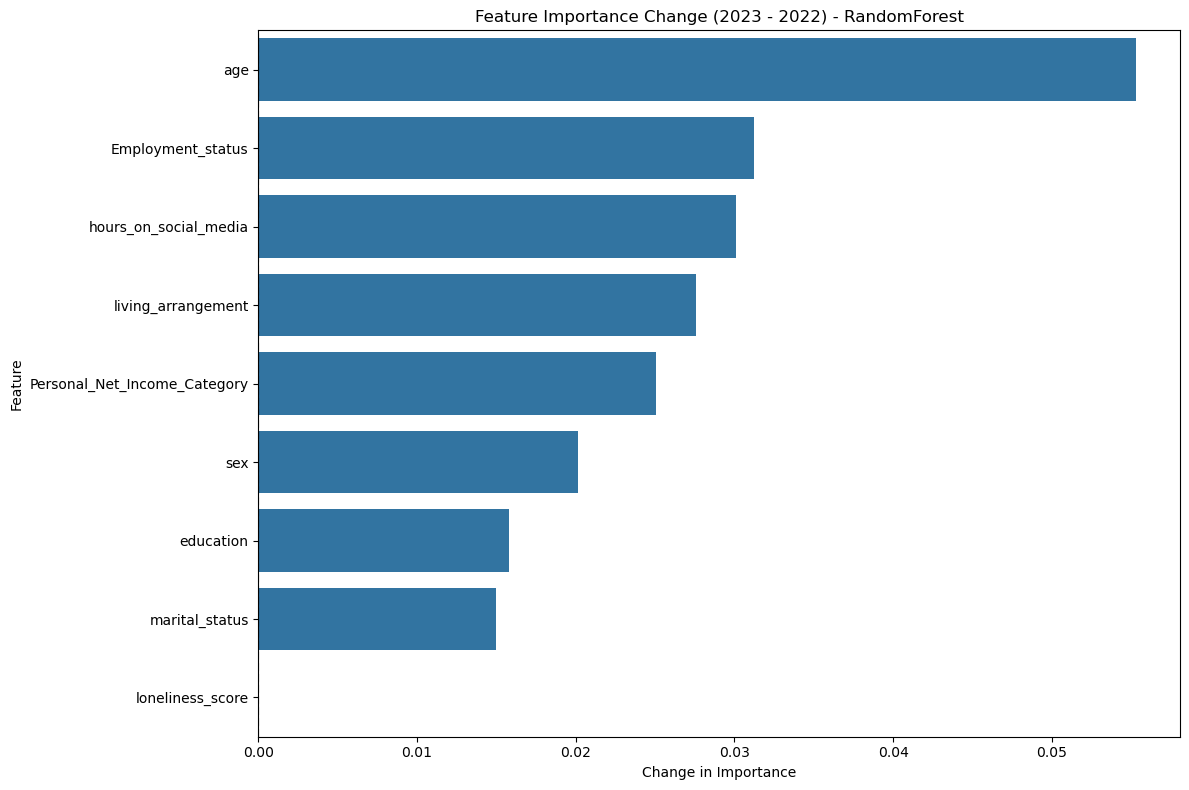


=== Performance Comparison Summary: 2022 vs 2023 ===
Metric            2022      2023    Change
------------------------------------------
Accuracy        0.5327    0.6872    0.1545
F1 Score        0.5747    0.7159    0.1412
Precision       0.6581    0.7789    0.1208
Recall          0.5327    0.6872    0.1545
AUC-ROC         0.5386    0.7901    0.2515
Avg Prec        0.2929    0.5888    0.2960


In [143]:
# Continue from previous code - Add these visualizations for 2023 data
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, 
    ConfusionMatrixDisplay,
    roc_curve, 
    auc, 
    precision_recall_curve, 
    average_precision_score
)
from sklearn.inspection import permutation_importance

# We already predicted y_pred_2023 using best_estimator
# Get probabilities for 2023 data if the model supports it
if hasattr(best_estimator, "predict_proba"):
    y_proba_2023 = best_estimator.predict_proba(X_test_2023_clean)[:, 1]
    
    # === ROC Curve for 2023 ===
    plt.figure(figsize=(10, 8))
    fpr_2023, tpr_2023, _ = roc_curve(y_test_2023, y_proba_2023)
    roc_auc_2023 = auc(fpr_2023, tpr_2023)
    plt.plot(fpr_2023, tpr_2023, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_2023:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {best_model_name} on 2023 Data')
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
    plt.show()
    print(f"AUC-ROC (2023): {roc_auc_2023:.4f}")
    
    # === Precision-Recall Curve for 2023 ===
    plt.figure(figsize=(10, 8))
    precision_2023, recall_2023, _ = precision_recall_curve(y_test_2023, y_proba_2023)
    pr_auc_2023 = average_precision_score(y_test_2023, y_proba_2023)
    plt.plot(recall_2023, precision_2023, color='green', lw=2, 
             label=f'Precision-Recall curve (AP = {pr_auc_2023:.4f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {best_model_name} on 2023 Data')
    plt.legend(loc="upper right")
    plt.grid(True, alpha=0.3)
    plt.show()
    print(f"Average Precision (2023): {pr_auc_2023:.4f}")
    
    # Compare 2022 vs 2023 ROC curves on one plot
    plt.figure(figsize=(10, 8))
    # Get 2022 ROC curve data (assuming you've already calculated this)
    fpr_2022, tpr_2022, _ = roc_curve(y_test, y_proba)
    roc_auc_2022 = auc(fpr_2022, tpr_2022)
    
    plt.plot(fpr_2022, tpr_2022, color='blue', lw=2, label=f'2022 ROC (AUC = {roc_auc_2022:.4f})')
    plt.plot(fpr_2023, tpr_2023, color='red', lw=2, label=f'2023 ROC (AUC = {roc_auc_2023:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve Comparison - {best_model_name} (2022 vs 2023)')
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # Compare 2022 vs 2023 Precision-Recall curves on one plot
    plt.figure(figsize=(10, 8))
    # Get 2022 PR curve data (assuming you've already calculated this)
    precision_2022, recall_2022, _ = precision_recall_curve(y_test, y_proba)
    pr_auc_2022 = average_precision_score(y_test, y_proba)
    
    plt.plot(recall_2022, precision_2022, color='blue', lw=2, label=f'2022 PR Curve (AP = {pr_auc_2022:.4f})')
    plt.plot(recall_2023, precision_2023, color='red', lw=2, label=f'2023 PR Curve (AP = {pr_auc_2023:.4f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve Comparison - {best_model_name} (2022 vs 2023)')
    plt.legend(loc="upper right")
    plt.grid(True, alpha=0.3)
    plt.show()
else:
    print(f"Note: {best_model_name} does not support probability predictions for ROC and PR curves")

# === Confusion Matrix for 2023 ===
plt.figure(figsize=(8, 6))
cm_2023 = confusion_matrix(y_test_2023, y_pred_2023)
disp_2023 = ConfusionMatrixDisplay(confusion_matrix=cm_2023)
disp_2023.plot(cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name} on 2023 Data')
plt.show()

# Print confusion matrix values
print("\nConfusion Matrix (2023):")
print(f"True Negatives: {cm_2023[0,0]}")
print(f"False Positives: {cm_2023[0,1]}")
print(f"False Negatives: {cm_2023[1,0]}")
print(f"True Positives: {cm_2023[1,1]}")

# Display 2022 vs 2023 confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
# 2022 CM
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp1.plot(ax=axes[0], cmap='Blues')
axes[0].set_title(f'{best_model_name} - 2022 Data')
# 2023 CM
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_2023, display_labels=[0, 1])
disp2.plot(ax=axes[1], cmap='Blues')
axes[1].set_title(f'{best_model_name} - 2023 Data')
plt.tight_layout()
plt.show()

# === Permutation Feature Importance for 2023 ===
print("\nCalculating Permutation Feature Importance for 2023 data...")
result_2023 = permutation_importance(
    best_estimator, 
    X_test_2023_clean, 
    y_test_2023, 
    scoring='f1_weighted', 
    n_repeats=10, 
    random_state=42, 
    n_jobs=-1
)

# Get feature names for 2023 data
feature_names_2023 = X_test_2023.columns if hasattr(X_test_2023, 'columns') else [f"Feature {i}" for i in range(X_test_2023.shape[1])]

# Sort features by importance
sorted_idx_2023 = result_2023.importances_mean.argsort()[::-1]

# Plot feature importance for 2023
plt.figure(figsize=(12, 8))
sns.barplot(
    x=result_2023.importances_mean[sorted_idx_2023], 
    y=[feature_names_2023[i] for i in sorted_idx_2023]
)
plt.title(f"Feature Importance - {best_model_name} on 2023 Data")
plt.xlabel("Mean Decrease in F1 Score")
plt.tight_layout()
plt.show()

# Print top features with importance values for 2023
print("\nTop 10 Most Important Features (2023):")
for i in sorted_idx_2023[:10]:
    feature_name = feature_names_2023[i]
    print(f"{feature_name}: {result_2023.importances_mean[i]:.4f} ± {result_2023.importances_std[i]:.4f}")

# Compare feature importances between 2022 and 2023
# Get top 10 features from both years
top_features_2022 = [feature_names[i] for i in sorted_idx[:10]]
top_importances_2022 = result.importances_mean[sorted_idx[:10]]

top_features_2023 = [feature_names_2023[i] for i in sorted_idx_2023[:10]]
top_importances_2023 = result_2023.importances_mean[sorted_idx_2023[:10]]

# Create a feature comparison dataframe
import pandas as pd
comparison_df = pd.DataFrame({
    'Feature': list(set(top_features_2022 + top_features_2023)),
})

# Add importances for 2022
for feature in comparison_df['Feature']:
    if feature in top_features_2022:
        idx = top_features_2022.index(feature)
        comparison_df.loc[comparison_df['Feature'] == feature, '2022_Importance'] = top_importances_2022[idx]
    else:
        comparison_df.loc[comparison_df['Feature'] == feature, '2022_Importance'] = 0

# Add importances for 2023
for feature in comparison_df['Feature']:
    if feature in top_features_2023:
        idx = top_features_2023.index(feature)
        comparison_df.loc[comparison_df['Feature'] == feature, '2023_Importance'] = top_importances_2023[idx]
    else:
        comparison_df.loc[comparison_df['Feature'] == feature, '2023_Importance'] = 0

# Calculate importance change
comparison_df['Change'] = comparison_df['2023_Importance'] - comparison_df['2022_Importance']
comparison_df = comparison_df.sort_values('Change', ascending=False)

# Plot feature importance change
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Change',
    y='Feature',
    data=comparison_df
)
plt.title(f"Feature Importance Change (2023 - 2022) - {best_model_name}")
plt.xlabel("Change in Importance")
plt.axvline(x=0, color='black', linestyle='--')
plt.tight_layout()
plt.show()

# Print summary statistics comparing 2022 and 2023 performance
print("\n=== Performance Comparison Summary: 2022 vs 2023 ===")
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Calculate metrics for 2022
accuracy_2022 = accuracy_score(y_test, y_pred)
f1_2022 = f1_score(y_test, y_pred, average='weighted')
precision_2022 = precision_score(y_test, y_pred, average='weighted')
recall_2022 = recall_score(y_test, y_pred, average='weighted')

# Calculate metrics for 2023
accuracy_2023 = accuracy_score(y_test_2023, y_pred_2023)
f1_2023 = f1_score(y_test_2023, y_pred_2023, average='weighted')
precision_2023 = precision_score(y_test_2023, y_pred_2023, average='weighted')
recall_2023 = recall_score(y_test_2023, y_pred_2023, average='weighted')

# Print comparison table
print(f"{'Metric':<12}{'2022':>10}{'2023':>10}{'Change':>10}")
print(f"{'-'*42}")
print(f"{'Accuracy':<12}{accuracy_2022:>10.4f}{accuracy_2023:>10.4f}{accuracy_2023-accuracy_2022:>10.4f}")
print(f"{'F1 Score':<12}{f1_2022:>10.4f}{f1_2023:>10.4f}{f1_2023-f1_2022:>10.4f}")
print(f"{'Precision':<12}{precision_2022:>10.4f}{precision_2023:>10.4f}{precision_2023-precision_2022:>10.4f}")
print(f"{'Recall':<12}{recall_2022:>10.4f}{recall_2023:>10.4f}{recall_2023-recall_2022:>10.4f}")
if 'roc_auc_2022' in locals() and 'roc_auc_2023' in locals():
    print(f"{'AUC-ROC':<12}{roc_auc_2022:>10.4f}{roc_auc_2023:>10.4f}{roc_auc_2023-roc_auc_2022:>10.4f}")
if 'pr_auc_2022' in locals() and 'pr_auc_2023' in locals():
    print(f"{'Avg Prec':<12}{pr_auc_2022:>10.4f}{pr_auc_2023:>10.4f}{pr_auc_2023-pr_auc_2022:>10.4f}")